## Método da Iteração Linear (Ponto Fixo)

Este notebook explora aspectos do método da _iteração linear_, ou também chamado de método do _ponto fixo_.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Exemplo

Estudamos a função $f(x) = x^2 + x - 6$.

Raízes: x1 = -3.000000, x2 = 2.000000


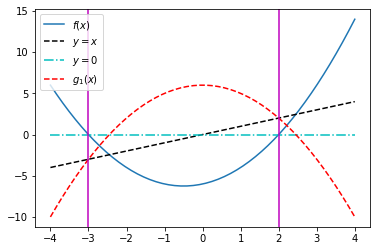

In [8]:
x = np.linspace(-4,4,50)
f = lambda x: x**2 + x - 6

xr = np.roots([1,1,-6])
print('Raízes: x1 = {:f}, x2 = {:f}'.format(xr[0], xr[1]))

# função de iteração
g1 = lambda x: 6 - x**2

plt.plot(x,f(x),label='$f(x)$');
plt.plot(x,x,'k--',label='$y=x$');
plt.plot(x,0*x,'c-.',label='$y=0$');
plt.plot(x,g1(x),'r--',label='$g_1(x)$');

plt.axvline(-3,-5,10,color='m');
plt.axvline(2,-5,10,color='m');
plt.legend(loc='best');

## Exemplo

Estudamos a função $f(x) = \exp(x) -x$

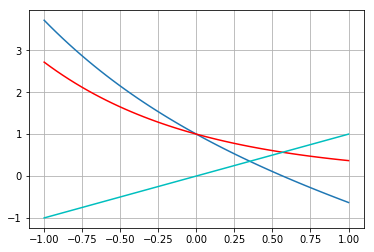

In [49]:
x2 = np.linspace(-1,1,50)

f2 = lambda x: np.exp(-x) - x
g2 = lambda x:  np.exp(-x)

plt.plot(x2,f2(x2),x2,g2(x2),'r',x2,x2,'c')
plt.grid(True)

## Implementação do método do ponto fixo

In [20]:
def ponto_fixo(x0,f,g,tol,N,vis):
    """ 
    Resolve problema de determinacao de raizes pelo 
    metodo do ponto fixo (iteracao linear).
    
    entrada: 
    
       x0  - aproximacao inicial        (float)
        f  - funcao a ser resolvida     (str)
        g  - funcao de iteracao         (str)
       tol - tolerancia                 (float)
        N  - numero maximo de iteracoes (int)
      vis  - flag para plotagem         (bool)
      
    saida:  
    
       x   - raiz aproximada para f     (float)      
    """
    from numpy import linspace
    from matplotlib.pyplot import plot,legend

    # funcoes
    f = eval('lambda x:' + f)
    g = eval('lambda x:' + g)
    
    # inicializacao
    it = 0 # contador 
    x, xn = x0, x0 + 1 # iteradas atual, anterior
    
    e = abs(x-xn)/abs(x) # erro    

    # tabela
    print('i\t x\t\t f(x)\t\t ER')
    print('{0:d}\t {1:f}\t {2:f}\t {3:e}'.format(it,x,f(x),e))       
    
    # laco
    while e >= tol and it <= N:
        it += 1    
        xn = x                             
        x = g(xn)               
        e = abs(x-xn)/abs(x)         
        print('{0:d}\t {1:f}\t {2:f}\t {3:e}'.format(it,x,f(x),e))      
        
        if it > N:
            print('Solução nao alcancada com N iteracoes.')
            break
       
    if vis == True:
        dx = 2*x
        dom = linspace(x - dx,x + dx,30)
        plot(dom,f(dom),label='$f(x)$')
        plot(dom,dom*0,label='$y=0$')
        plot(dom,g(dom),label='$g(x)$')
        plot(dom,dom,label='$y=x$')
        legend()
        
    return x

## Estudo de caso: $f(x) = x^2 + x - 6$

Função de iteração: $g(x) = \sqrt{6 - x}$

i	 x		 f(x)		 ER
0	 0.100000	 -5.890000	 1.000000e+01
1	 2.428992	 2.328992	 9.588307e-01
2	 1.889711	 -0.539280	 2.853771e-01
3	 2.027385	 0.137674	 6.790695e-02
4	 1.993142	 -0.034243	 1.718024e-02
5	 2.001714	 0.008572	 4.282174e-03
6	 1.999572	 -0.002142	 1.071346e-03
7	 2.000107	 0.000536	 2.677864e-04
8	 1.999973	 -0.000134	 6.694973e-05
9	 2.000007	 0.000033	 1.673724e-05
10	 1.999998	 -0.000008	 4.184321e-06


1.9999983262723453

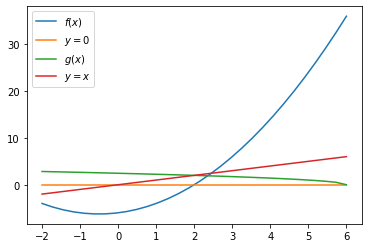

In [21]:
f = 'x**2 + x - 6'
g = '(6 - x)**(1/2)'

x0 = 0.1
tol = 1e-5
N = 100

ponto_fixo(x0,f,g,tol,N,True)

Função de iteração: $g(x) = -\sqrt{6 - x}$

i	 x		 f(x)		 ER
0	 0.100000	 -5.890000	 1.000000e+01
1	 -2.428992	 -2.528992	 1.041169e+00
2	 -2.903273	 -0.474281	 1.633608e-01
3	 -2.983835	 -0.080563	 2.699970e-02
4	 -2.997305	 -0.013469	 4.493853e-03
5	 -2.999551	 -0.002246	 7.488072e-04
6	 -2.999925	 -0.000374	 1.247965e-04
7	 -2.999988	 -0.000062	 2.079929e-05
8	 -2.999998	 -0.000010	 3.466545e-06


-2.9999979200736955

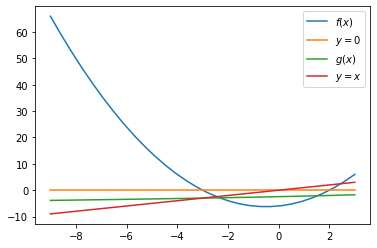

In [22]:
f = 'x**2 + x - 6'
g = '-(6 - x)**(1/2)'

x0 = 0.1
tol = 1e-5
N = 100

ponto_fixo(x0,f,g,tol,N,True)